# Question 1: PCA

a,b, Run a PCA with selected dataset with five variables

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('/Users/guan-hunglai/Desktop/HW 5/glass.csv')
x1 = df[['RI', 'Na', 'Mg', 'Al','Si']].values
x1

array([[ 1.52101, 13.64   ,  4.49   ,  1.1    , 71.78   ],
       [ 1.51761, 13.89   ,  3.6    ,  1.36   , 72.73   ],
       [ 1.51618, 13.53   ,  3.55   ,  1.54   , 72.99   ],
       ...,
       [ 1.52065, 14.36   ,  0.     ,  2.02   , 73.42   ],
       [ 1.51651, 14.38   ,  0.     ,  1.94   , 73.61   ],
       [ 1.51711, 14.23   ,  0.     ,  2.08   , 73.36   ]])

In [16]:
import matplotlib.pyplot as plot
%matplotlib inline
plot.style.use('seaborn')

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pc = pca.fit_transform(x1)

np.set_printoptions(suppress=True)
print (pca.explained_variance_)
print (pca.explained_variance_ratio_*100)
print (np.cumsum(pca.explained_variance_ratio_)*100)

[2.23141152 0.67216014 0.51042302 0.18258561 0.00000206]
[62.04255316 18.6888573  14.19189036  5.07664203  0.00005716]
[ 62.04255316  80.73141046  94.92330081  99.99994284 100.        ]


c. Plot the eigenvalues of all PCs with log scale

Text(0.5,1,'Eigenvalues vs. principle components')

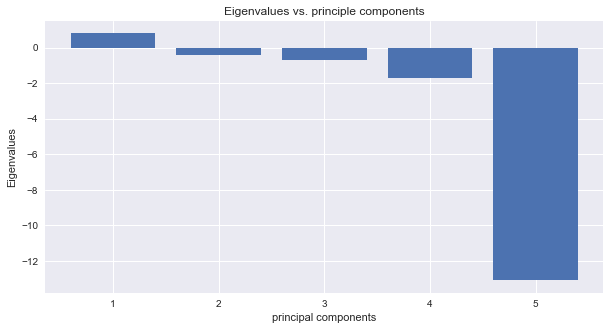

In [13]:
#Plot the Eigenvalues
plot.rcParams['figure.figsize'] = (10,5)
plot.bar(np.arange(1,pc.shape[1]+1),np.log(pca.explained_variance_))
plot.xlabel('principal components')
plot.ylabel('Eigenvalues')
plot.title('Eigenvalues vs. principle components')

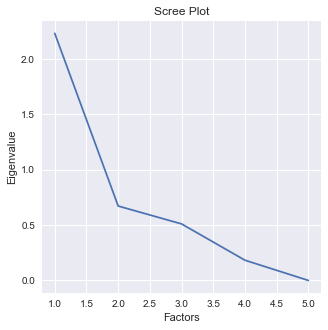

In [14]:
# Draw a scree plot
eigenvalues = pca.explained_variance_
plt.rcParams['figure.figsize'] = (5,5)
plt.plot([1,2,3,4,5],eigenvalues)
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.savefig('scree plot.png',dpi = 500)
plt.show()

#We can see that suggested number of factors is 2

d. Plot the cumulative sum over the collection variances Determine the optimal number of components

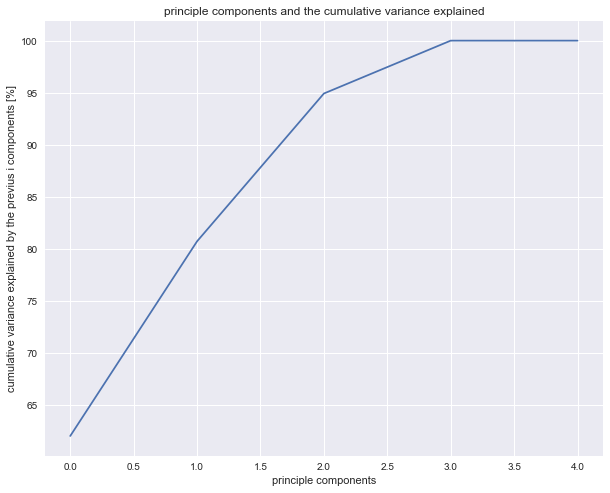

In [130]:
plot.rcParams['figure.figsize'] = (10,8)
plot.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plot.ticklabel_format(useOffset=False)
plot.xlabel('principle components')
plot.ylabel('cumulative variance explained by the previus i components [%]');
plot.title('principle components and the cumulative variance explained')
plot.show()

#Optimal number of PC = 2 or 3 according to the cumulative sum over the collection variances

d. Eigenvectors

In [17]:
#EigenVectors
print(pca.components_)

[[ 0.00007985  0.20168728 -0.9583042   0.17414138  0.10319916]
 [ 0.00065515  0.73097127  0.08860062  0.04121286 -0.67537546]
 [ 0.00249479 -0.65190732 -0.19588097  0.10659401 -0.72476133]
 [-0.00449389  0.00433225  0.18823337  0.97805791  0.08906151]
 [-0.99998657 -0.00115086 -0.00135307 -0.0040885  -0.00264263]]


In [20]:
x_pca = pc[:,0:2]
x_pca.shape

(214, 2)

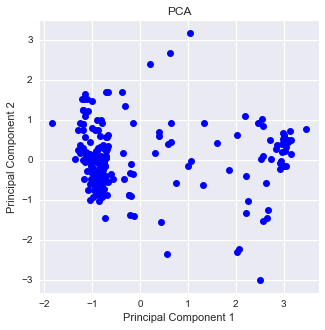

In [22]:
pcadataframe = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
plot.rcParams['figure.figsize'] = (5,5)
plot.plot(pcadataframe['principal component 1'], pcadataframe['principal component 2'],'bo')
plot.xlabel('Principal Component 1')
plot.ylabel('Principal Component 2')
plot.title('PCA')
plot.show()

# Question 2: K-Means Clustering

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('/Users/guan-hunglai/Desktop/HW 5/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [30]:
#A
f1 = df['K'].values
f2 = df['Al'].values
X = np.array(list(zip(f1, f2)))

In [31]:
#Visualize raw data and initial centroids
k = 3
C_x = np.random.randint(0,np.max(X), size = k)
C_y = np.random.randint(0,np.max(X), size = k)
C = np.array(list(zip(C_x, C_y)), dtype = np.float32)

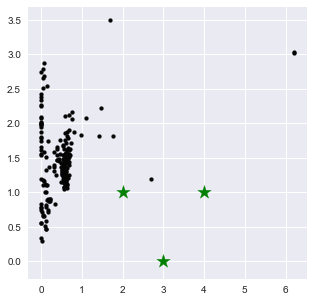

In [32]:
#Plotting alongside the initial centroids
plt.scatter(f1, f2, c ='#050505', s =15)
plt.scatter(C_x, C_y, marker = '*', s = 200, c = 'g')

In [33]:
#B,C - Try it with 3 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
KModel = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = KModel.cluster_centers_

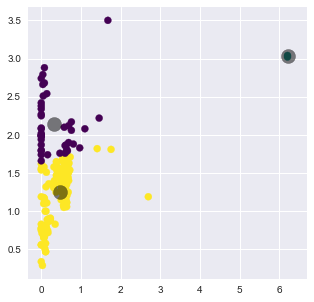

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

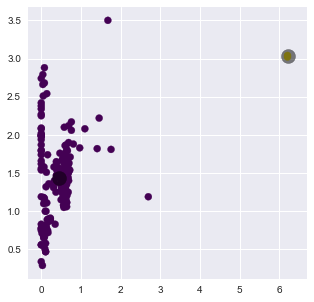

In [35]:
#Try it with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
KModel = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = KModel.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

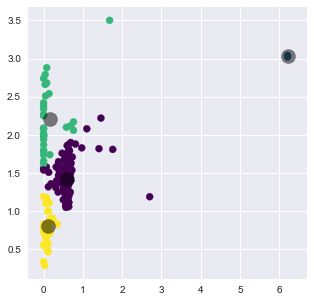

In [36]:
# 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
KModel = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = KModel.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Based on domain knowledge, we decided that 3 clusters provide the optimal K

Text(0.5,1,'elbow method to get optimal k')

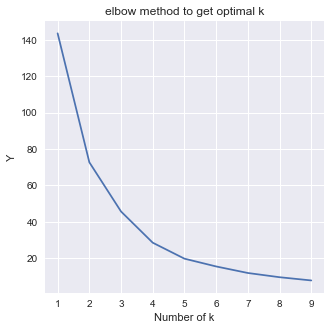

In [37]:
#D - Elbow technique to determine number of k
S = []
knum = range(1,10)
for k in knum:
    KM = KMeans(n_clusters=k)
    KM = KM.fit(X)
    S.append(KM.inertia_)


plt.plot(knum, S)
plt.xlabel('Number of k')
plt.ylabel('Y')
plt.title("elbow method to get optimal k")
#From the elbow graph, we can see that the optimal k is 4

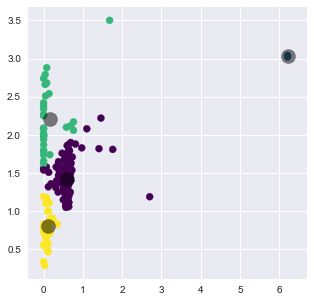

In [38]:
# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

df['cluster'] = labels
df = df.reset_index(drop=True)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [39]:
#E - K-Means Clustering for scaled data
from sklearn.preprocessing import scale
dataset = pd.DataFrame(scale(df))
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275,1.786441
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275,-0.680000
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275,-0.680000
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275,-0.680000
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275,-0.680000


In [40]:
scaledf = dataset[[6, 7]]

In [41]:
p1 = scaledf[6].values
p2 = scaledf[7].values
X2 = np.array(list(zip(p1, p2)))

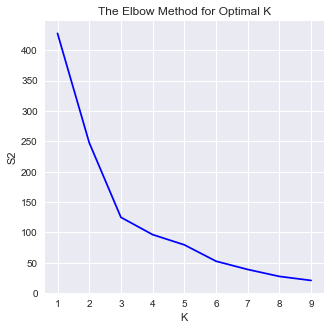

In [42]:
S2 = []
K1 = range(1,10)
for k in K1:
    km = KMeans(n_clusters = k)
    km = km.fit(X2)
    S2.append(km.inertia_)
    
plt.plot(K1,S2,'bx-')
plt.xlabel('K')
plt.ylabel("S2")
plt.title("The Elbow Method for Optimal K")
plt.savefig('optimal k.png',dpi = 500)

#The optimal k based on the elbow plot for standardized data is 3

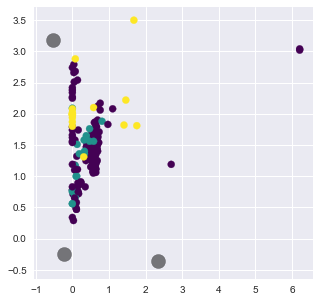

In [43]:
from sklearn.cluster import KMeans
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X2)
# Getting the cluster labels
labels = kmeans.predict(X2)
# Centroid values
centroids = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);